# DEMO Python Notebook
# **Darts’** 'Swiss Knife' Library for **Time Series Forecasting**
### A Multi-Method Python Package to Analyze Your Time Series Data

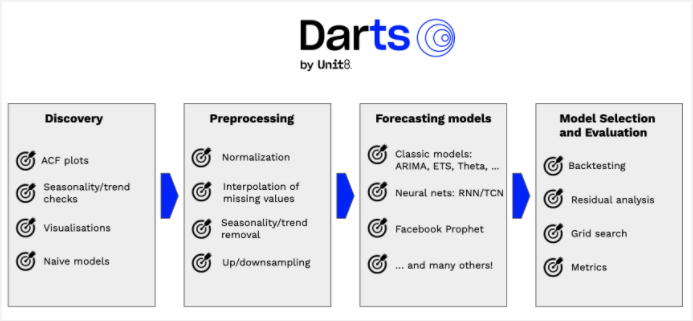

**Darts** is a Python library for user-friendly forecasting and anomaly detection on time series. It contains a variety of models, from classics such as ARIMA to deep neural networks. The forecasting models can all be used in the same way, using fit() and predict() functions, similar to scikit-learn.  

Darts supports both univariate and multivariate time series and models. The ML-based models can be trained on potentially large datasets containing multiple time series, and some of the models offer a rich support for probabilistic forecasting.

---   
**Example Data**: A monthly time series data of the (international) **Air Passengers** of Pan Am airline in the United Stades of America from 1 Jan 1949 to 1 Dec 1960. Each row contains the air passenger number for a month of that particular year. The numbers were obtained from the Federal Aviation Administration. The company used the data to predict future demand before ordering new aircraft and training aircrew.  

Sources:
* See [Darts](https://unit8co.github.io/darts/README.html) official documentation
* See [Unit8](https://unit8.com/resources/darts-time-series-made-easy-in-python/) for more information and tipps
* [Time Series Forecasting made easy with Darts](https://towardsdatascience.com/time-series-forecasting-made-easy-with-darts-3be0b8ba02f4)

---
Author:
*   dr.daniel benninger  [> Linkedin](https://www.linkedin.com/in/danielbenninger/)

History:
*  v1, April 2023, dbe --- initial version for BINA FS23  
---  

## **DARTS - Time Series Made Easy With Python**

- A very easy time series analysis library
- Allows  univariate and multivariate time series fore-casting.
- Has models like `arima`, `auto-arima`, `deep neural networks`
- Similar to sklearn
- Uses fit and predict method
- Example uses in build dataset


## Installing And Loading

In [ ]:
import pandas as pd


In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


# Loading Datasets

In [ ]:
from darts.datasets import AirPassengersDataset

**AirPassengers** Dataset about how many passenger rode on a particular date

## Checking The Data

In [ ]:
# checking raw
AirPassengersDataset().load()


<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

Mixture of Array and Coordinates where:
- Passengers - array - int64
- Month - DateTime


In [ ]:
# array + df - conversion to dataframe
print("Air Passanger Dataset\n",AirPassengersDataset().load().pd_dataframe())

Air Passanger Dataset
 component   #Passengers
Month                  
1949-01-01        112.0
1949-02-01        118.0
1949-03-01        132.0
1949-04-01        129.0
1949-05-01        121.0
...                 ...
1960-08-01        606.0
1960-09-01        508.0
1960-10-01        461.0
1960-11-01        390.0
1960-12-01        432.0

[144 rows x 1 columns]


same as raw but in a dataframe format :
- Month/Day/Date column : `Month`
- Associated Data : `Passengers`

# Plotting the Dataset

In [ ]:
#!pip uninstall matplotlib
#!pip install matplotlib==3.1.3

In [ ]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading Dataset
air_ds = AirPassengersDataset().load()

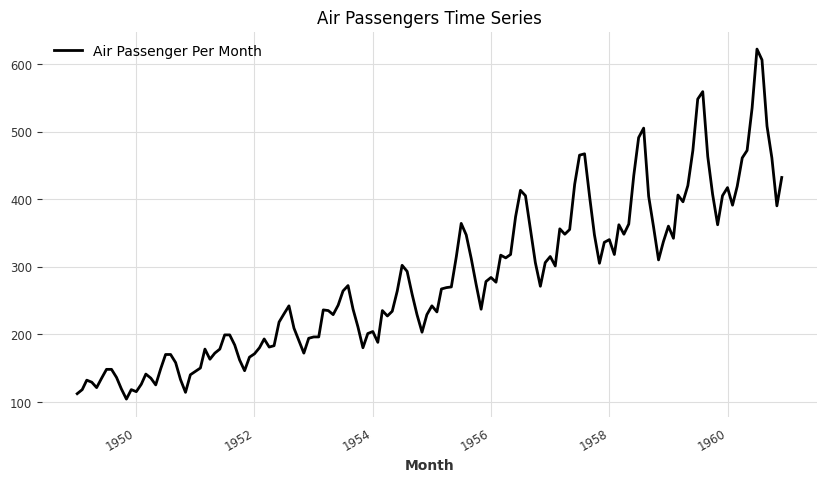

In [ ]:
plt.figure(figsize=(10,5))

air_ds.plot(label="Air Passenger Per Month" )

plt.title("Air Passengers Time Series")
plt.legend()

plt.show()

---
# Data Processing
Includes:
- Standard Scaling
- Train Test Split


### Standard Scaling

Standard scaling  technique can be used to convert varied data on the same scale.

- `Scaler()` - Provided by dart uses same `fit_transform` method as provided by other libraries and works the same way.

> Note: `fit_transform`is different from `fit` in that it combines both fit and transform methods on one go. One may want to use it as it increases efficiency for the data scaling and reduce the code

In [ ]:
from darts.dataprocessing.transformers import Scaler

# creating scaler object
scaler_air = Scaler()


In [ ]:
# performing the scaling
air_ds_scaled = scaler_air.fit_transform(air_ds)

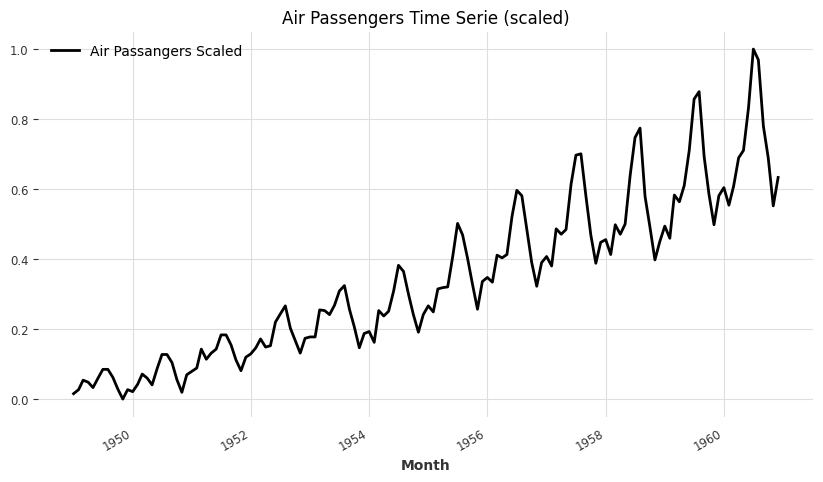

In [ ]:
plt.figure(figsize=(10,5))

air_ds_scaled.plot(label = "Air Passangers Scaled")

plt.title("Air Passengers Time Serie (scaled)")
plt.legend()

plt.show()

> Both dataset observation is now **on same scale** of [0-1]

---
# Forecast Model Creation

 ## Train Test Split - Includes last as it is most promising data
- train set - first 36 data point
- val set - next 36 data point

In [ ]:
train_air_ds,  val_air_ds = air_ds_scaled[:-36], air_ds_scaled[-36:]

## Creating Model And Forecasting

Will create a single model which will forecast for both dataset - great!

In [ ]:
# importing model
from darts.models import NBEATSModel

In [ ]:
# creating a model object
model = NBEATSModel(input_chunk_length=24 ,
                    output_chunk_length=12,
                    n_epochs = 100 ,
                    random_state = 15
                    )

In [ ]:
# fitting the model
model.fit(train_air_ds, verbose = True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=15)

## Predict + Evaluate Results
+ **MAPE** - Mean Average Precession Error

In [ ]:
from darts.metrics import mape

In [ ]:
pred_air = model.predict(n = 36,
                         series = train_air_ds
                         )

print("Mape AIR = {:.2f}%".format(mape(air_ds_scaled , pred_air)))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Mape AIR = 10.51%


## Visualize: Original + Forecasted Values

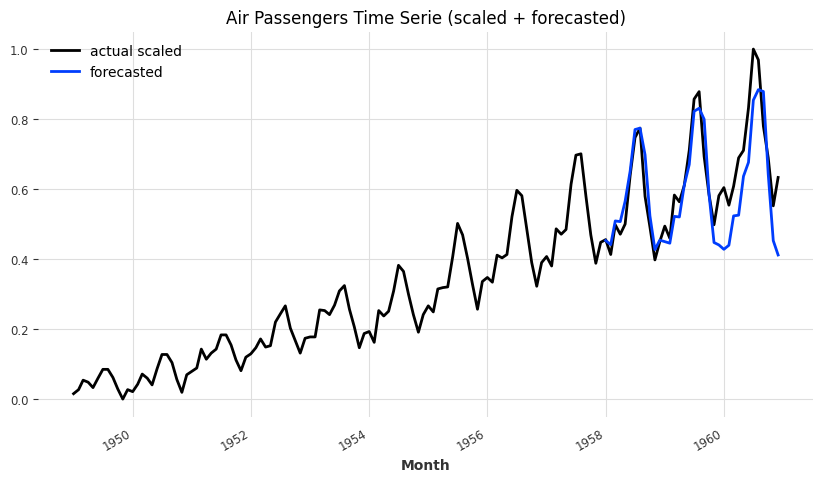

Mape AIR = 10.51%


In [ ]:
# plotting results
plt.figure(figsize=(10,5))

air_ds_scaled.plot(label = "actual scaled")
pred_air.plot(label = "forecasted") # validation data set

plt.title("Air Passengers Time Serie (scaled + forecasted)")
plt.legend()

plt.show()

print("Mape AIR = {:.2f}%".format(mape(air_ds_scaled , pred_air)))

In [ ]:
# show model parms
model.model_params, model.residuals

(OrderedDict([('output_chunk_shift', 0),
              ('generic_architecture', True),
              ('num_stacks', 30),
              ('num_blocks', 1),
              ('num_layers', 4),
              ('layer_widths', 256),
              ('expansion_coefficient_dim', 5),
              ('trend_polynomial_degree', 2),
              ('dropout', 0.0),
              ('activation', 'ReLU'),
              ('input_chunk_length', 24),
              ('output_chunk_length', 12),
              ('n_epochs', 100),
              ('random_state', 15)]),
 <bound method ForecastingModel.residuals of NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=15)>)

## Save and Restore the Forecast Model

In [ ]:
#save model to file
model.save("AirModel.pt")

In [ ]:
from darts.models import NBEATSModel

#reload saved model
model_loaded = NBEATSModel.load("AirModel.pt")

In [ ]:
# show params of the reloaded model
model_loaded.model_params

OrderedDict([('generic_architecture', True),
             ('num_stacks', 30),
             ('num_blocks', 1),
             ('num_layers', 4),
             ('layer_widths', 256),
             ('expansion_coefficient_dim', 5),
             ('trend_polynomial_degree', 2),
             ('dropout', 0.0),
             ('activation', 'ReLU'),
             ('input_chunk_length', 24),
             ('output_chunk_length', 12),
             ('n_epochs', 100),
             ('random_state', 15)])

In [ ]:
#forecast with reloaded model
pred_airX = model_loaded.predict(n = 36, series = train_air_ds)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

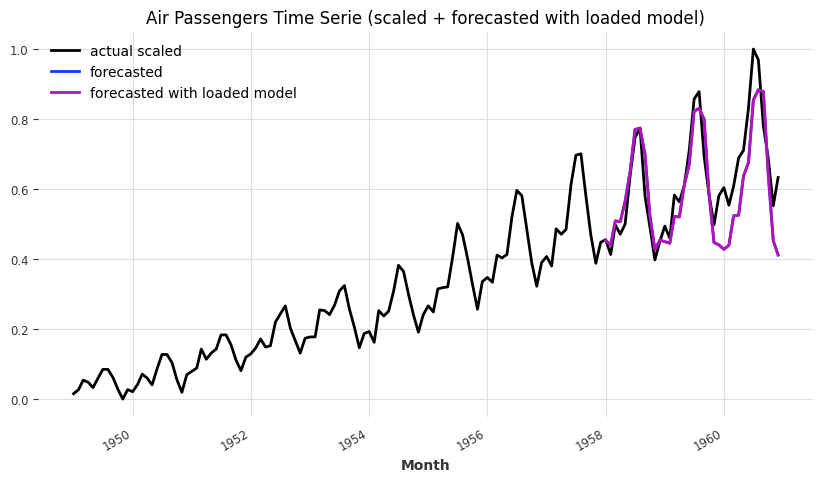

In [ ]:
# plotting results
plt.figure(figsize=(10,5))

air_ds_scaled.plot(label = "actual scaled")
pred_air.plot(label = "forecasted") # validation data set
pred_airX.plot(label = "forecasted with loaded model") # validation data set

plt.title("Air Passengers Time Serie (scaled + forecasted with loaded model)")
plt.legend()

plt.show()